In [1]:
# check if the data is in the environment 

%cd /content/data/sample/train
%ls

/content/data/sample/train
clear/  cloudy/  haze/  partly_cloudy/


# Imports

In [2]:
!pip install -U bcolz

    100% |████████████████████████████████| 1.5MB 7.4MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz


In [3]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os
import bcolz
import time

Using TensorFlow backend.


#Data Loader

In [0]:
train_path = '/content/data/sample/train'
validation_path = '/content/data/sample/validation'
test_path = '/content/data/sample/test'

batch_size = 10

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,
                                                        target_size = (224,224),
                                                        classes = ['clear', 'cloudy', 'haze', 'partly_cloudy'],
                                                        batch_size = batch_size)

validation_batches = ImageDataGenerator().flow_from_directory(validation_path,
                                                        target_size = (224,224),
                                                        classes = ['clear', 'cloudy', 'haze', 'partly_cloudy'],
                                                        batch_size = batch_size)

test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                        target_size = (224,224),
                                                        classes = ['clear', 'cloudy', 'haze', 'partly_cloudy'],
                                                        batch_size = 20)

Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [0]:
# plots images with labels 
def plots(ims, figsize = (12,6), rows = 1, interp = False, titles = None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if (ims.shape[-1] !=3):
      ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
      sp = f.add_subplot(rows, cols, i +1)
      sp.axis('Off')
      if titles is not None:
        sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')
    
    

In [0]:
imgs, labels = next(train_batches)

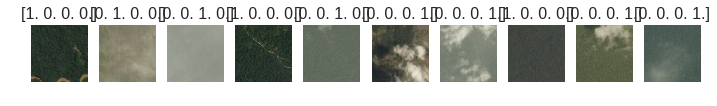

In [8]:
plots(imgs, titles = labels)

# Model: simple classifier from scratch

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (7,7)))
model.add(Flatten())
model.add(Dense(32*32*16, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))




```
# This is formatted as code
```

# Running Training Framework



In [0]:
steps = 2 # sample_size / batch_size : 20 / 10
n_epochs = 20
learning_rate = 1e-3

opt = Adam(lr = learning_rate)
loss = 'categorical_crossentropy'

In [11]:
model.compile(optimizer=opt, loss=loss, metrics = ['accuracy'])
model.fit_generator(train_batches, 
                    steps_per_epoch =steps, 
                    validation_data = validation_batches, 
                    validation_steps = steps,  
                    epochs = n_epochs, verbose = 2)

model.summary()

Epoch 1/20
 - 11s - loss: 11.2827 - acc: 0.3000 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 2/20
 - 1s - loss: 9.9094 - acc: 0.3500 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 3/20
 - 1s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/20
 - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 5/20
 - 1s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 6/20
 - 1s - loss: 11.2827 - acc: 0.3000 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 7/20
 - 1s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 8/20
 - 1s - loss: 11.2827 - acc: 0.3000 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 9/20
 - 1s - loss: 9.6709 - acc: 0.4000 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 10/20
 - 1s - loss: 11.2827 - acc: 0.3000 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 11/20
 - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 12/20
 - 1s - loss: 13.7004 - acc: 0.1500 - val_loss: 12.08

# Predict

In [0]:
test_imgs, test_labels = next(test_batches)

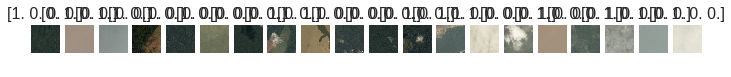

In [13]:
plots(test_imgs, titles = test_labels)

In [0]:
predictions = model.predict_generator(test_batches, steps = 1, verbose = 0)

In [0]:
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

In [0]:
def plot_confusion_matrix(cm, classes,
                         title = "Confusion matrix", cmap = plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes) 
  
  print(cm)
  
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
            horizontalalignment = "center",
            color = "white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

[[6 0 0 0]
 [7 0 0 0]
 [1 0 0 0]
 [6 0 0 0]]


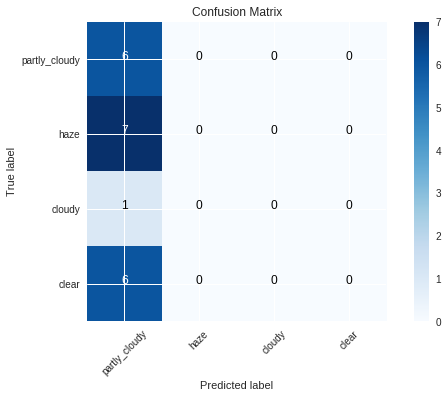

In [17]:
cm_plot_labels = ['partly_cloudy', 'haze', 'cloudy', 'clear']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

#Fine_tuned VGG16 model

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [19]:
# Generate a model with all layers (with top)
vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.layers.pop()
for layer in vgg16.layers:
  layer.trainable = False # freeze pre-trained weights


#Add a layer where input is the output of the  second last layer 
x = Dense(4, activation='softmax', name='predictions')(vgg16.layers[-1].output)

#Then create the corresponding model 
my_model = Model(input=vgg16.input, output=x)
my_model.summary()

553467904/553467096 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
steps = 2 # sample_size / batch_size : 20 / 10
n_epochs = 10
learning_rate = 1e-3

opt = Adam(lr = learning_rate)
loss = 'categorical_crossentropy'
my_model.compile(loss= loss, optimizer= opt, metrics=['accuracy'])

In [21]:
my_model.fit_generator(train_batches, 
                    steps_per_epoch =steps, 
                    validation_data = validation_batches, 
                    validation_steps = steps,  
                    epochs = n_epochs, verbose = 2)

my_model.summary()

Epoch 1/10
 - 2s - loss: 1.6228 - acc: 0.2500 - val_loss: 1.3349 - val_acc: 0.3500
Epoch 2/10
 - 1s - loss: 1.0502 - acc: 0.5000 - val_loss: 0.6977 - val_acc: 0.7500
Epoch 3/10
 - 1s - loss: 0.6797 - acc: 0.7500 - val_loss: 1.0163 - val_acc: 0.5500
Epoch 4/10
 - 1s - loss: 0.7077 - acc: 0.8500 - val_loss: 0.6529 - val_acc: 0.8000
Epoch 5/10
 - 1s - loss: 0.8436 - acc: 0.7000 - val_loss: 0.4790 - val_acc: 0.8000
Epoch 6/10
 - 1s - loss: 0.3694 - acc: 0.7500 - val_loss: 0.5951 - val_acc: 0.8000
Epoch 7/10
 - 1s - loss: 0.4030 - acc: 0.8000 - val_loss: 0.5753 - val_acc: 0.7500
Epoch 8/10
 - 1s - loss: 0.5287 - acc: 0.8500 - val_loss: 0.7219 - val_acc: 0.7500
Epoch 9/10
 - 1s - loss: 0.8423 - acc: 0.6500 - val_loss: 0.6784 - val_acc: 0.7500
Epoch 10/10
 - 1s - loss: 0.3831 - acc: 0.9000 - val_loss: 0.3302 - val_acc: 0.9500
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2

#Predictions

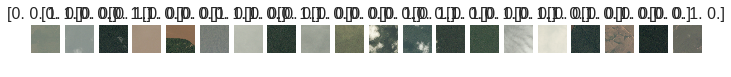

In [22]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [23]:
test_batches.class_indices

{'clear': 0, 'cloudy': 1, 'haze': 2, 'partly_cloudy': 3}

In [0]:
predictions = my_model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
np.set_printoptions(precision=2)

[[1 1 3 2]
 [1 2 2 1]
 [1 2 0 0]
 [1 1 1 1]]


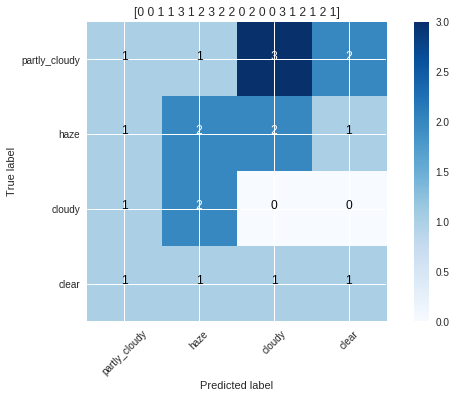

In [26]:
cm_plot_labels = ['partly_cloudy', 'haze', 'cloudy', 'clear']
plot_confusion_matrix(cm, cm_plot_labels, np.round(predictions).argmax(axis=1))